# 第１回 データセット取り扱いと機械学習基礎 

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

## 1-1. ライブラリの読み込み

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ
import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline
# jupyter内に描画

## 1-2. データファイルの読み込みと内容確認

In [3]:
# CSVファイルの読み込み
iris_original = pd.read_csv("data/iris_original.csv")
# または　iris_original = pd.read_csv(".\data\iris_original.csv", header=0)
# header=0 がデフォルト値なので省略できる
# 一つ上の階層を参照する場合は、「../」

In [4]:
# 読み込んだデータ（data frame）の確認 
#print(iris_original)

In [5]:
# 先頭5行
iris_original.head()

,a1,a2,a3,a4,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


In [6]:
# 末尾5行
iris_original.tail()

,a1,a2,a3,a4,id,label
145,6.7,3.0,5.2,2.3,id_146,Iris-virginica
146,6.3,2.5,5.0,1.9,id_147,Iris-virginica
147,6.5,3.0,5.2,2.0,id_148,Iris-virginica
148,6.2,3.4,5.4,2.3,id_149,Iris-virginica
149,5.9,3.0,5.1,1.8,id_150,Iris-virginica


In [7]:
# 学習用CSVファイルの読み込みと役割設定
iris_train = pd.read_csv("data/iris_train.csv")

# 説明変数
X_train = pd.DataFrame(iris_train.drop(["id","label"],axis=1)) # 複数列の削除, [A, B]はリスト

# 目的変数
y_train = pd.DataFrame(iris_train["label"]) # pd.DataFrame(iris_train.label) でも可

In [8]:
# 先頭５行
X_train.head()

,a1,a2,a3,a4
0,5.1,3.5,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,4.4,2.9,1.4,0.2


In [9]:
# 先頭５行
X_train.head()

,a1,a2,a3,a4
0,5.1,3.5,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,4.4,2.9,1.4,0.2


In [10]:
# 行数と列数を調べる
iris_train.shape

(105, 6)

In [11]:
# 検証用CSVファイルの読み込みと役割設定
iris_test = pd.read_csv("data/iris_test.csv")

# 説明変数
X_val = pd.DataFrame(iris_test.drop(["id","label"],axis=1)) # 複数列の削除

# 目的変数
y_val = pd.DataFrame(iris_test["label"])

In [12]:
# 行数と列数を調べる
iris_test.shape

(45, 6)

In [13]:
len(iris_test) # 行数だけ, len関数：オブジェクトに含まれる要素の数がint型として返ってくる

45

In [14]:
len(iris_test.columns) # 列数だけ

6

## 1-3. 初めての機械学習（決定木）

### 1-3-1. モデルの定義と学習

In [15]:
# モデルの設定, 決定木
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # clf: classifier（分類器） の略

# モデルの学習
clf = clf.fit(X_train, y_train)

In [16]:
# 学習させたモデル
print(clf)
# 学習データ内での精度(Closed)
print("Closed Accuracy:",clf.score(X_train, y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Closed Accuracy: 0.9809523809523809


### 1-3-2. 検証用データで評価

In [17]:
# 検証データで予測
y_pred = pd.DataFrame(clf.predict(X_val))

# 検証用データの予測精度(Open)
print("Open Accuracy:",clf.score(X_val, y_val))

Open Accuracy: 0.9555555555555556


Confusion Matrix
------------------
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
------------------


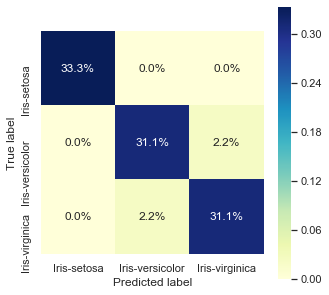

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set()

y_pred =  pd.DataFrame(clf.predict(X_val))

# 混合行列を作成する。
cm = confusion_matrix(y_val, y_pred)
cm_rate = cm / cm.sum()

# 混合行列を描画する。
def print_confusion_matrix(confusion_matrix, class_names):
    fig = plt.figure(figsize=(5, 5))
    heatmap = sns.heatmap(
        confusion_matrix, xticklabels=class_names, yticklabels=class_names,
        annot=True, fmt='.1%', cbar=True, square=True, cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

labels = ["Iris-setosa","Iris-versicolor", "Iris-virginica"]

print("Confusion Matrix")
print("------------------")
print(cm)
print("------------------")

print_confusion_matrix(cm_rate, labels)

# 縦軸の表示がおかしいのは matplotlib 3.1.1 のバグ
# https://teratail.com/questions/205195

In [19]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_pred, y_val, target_names=["Iris-setosa","Iris-versicolor", "Iris-virginica"])

#sklearn.metrics.classification_report(y_true, y_pred,
#    labels=None, target_names=None, 
#    sample_weight=None, digits=2)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

